In [1]:
from code.neuron import *
from code.encodingsource import *
from code.hsgs import *
from code.classical_neuron import *
from code.classical_pso import *
from code.sf import *
simulator = Aer.get_backend('qasm_simulator')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import time 

from code.experiment_functions import * 

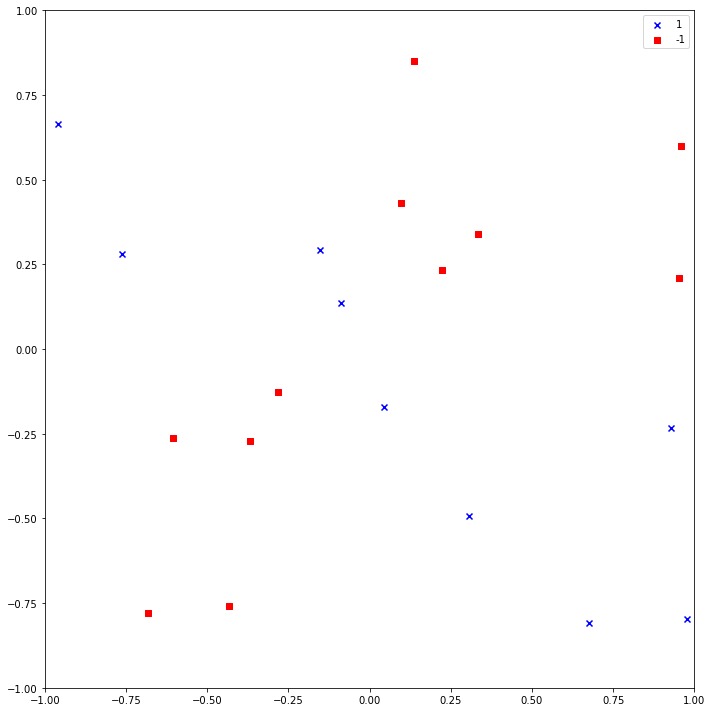

In [16]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
import numpy as np

# Create Dataset
np.random.seed(0)
X_xor =  np.random.uniform(-1, 1, (20, 4)) #np.random.rand(200, 4)

y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

fig = plt.figure(figsize=(10,10))
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_xor = np.round(X_xor, 2)
X_xor[X_xor == 0] = 0.01
X_train, X_test, y_train, y_test = train_test_split(X_xor, y_xor, test_size=0.33, random_state=42)

In [18]:
X_train = [list(x) for x in X_train]
X_test = [list(x) for x in X_test]
y_train = [int(1) if x == 1 else int(0) for x in y_train]
y_test = [int(1) if x == 1 else int(0) for x in y_test]

In [19]:
with open('results/version6/train_xor.json', 'w+') as fp:
    json.dump([X_train, y_train], fp)
    
with open('results/version6/test_xor.json', 'w+') as fp:
    json.dump([X_test, y_test], fp)

#### load saved data

In [2]:
with open('results/version6/train_xor.json') as json_file:
    X_train = json.load(json_file)[0]

with open('results/version6/train_xor.json') as json_file:
    y_train = json.load(json_file)[1]

In [3]:
with open('results/version6/test_xor.json') as json_file:
    X_test = json.load(json_file)[0]

with open('results/version6/test_xor.json') as json_file:
    y_test = json.load(json_file)[1]

## Test

In [23]:
weights = quantumNeuronFIT(X_train, 
                           y_train,
                           init_weight = [0.5, 0.5, 0.5, 0.5],
                           threshold=0.3,
                           lrParameter=0.1, 
                           n_epochs=20, 
                           trainingBias=True,
                           epoch_results=True,
                           phaseEstrategyOperator='original',
                           trainingApproaches={'hsgs','phase-encoding'})

lrParameter:  0.1
threshold:  0.3
trainingBias:  True
phaseEstrategyOperator:  original

erro HSGS 7
weights HSGS [0.462, 0.4869999999999999, 0.628, 0.10399999999999988, 1.7000000000000006, 1.7000000000000006, 1.7000000000000006, 1.7000000000000006]
erro phase encoding 5
weights phase encoding [0.484, 0.6900000000000001, 0.7490000000000001, 0.508, 0.9, 0.9, 0.9, 0.9]

erro HSGS 7
weights HSGS [0.42400000000000004, 0.47399999999999975, 0.7560000000000001, -0.29200000000000015, 2.4000000000000012, 2.4000000000000012, 2.4000000000000012, 2.4000000000000012]
erro phase encoding 6
weights phase encoding [0.29400000000000004, 0.9670000000000001, 0.806, 0.519, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001]

erro HSGS 7
weights HSGS [0.38600000000000007, 0.46099999999999963, 0.8840000000000002, -0.6880000000000003, 3.100000000000002, 3.100000000000002, 3.100000000000002, 3.100000000000002]
erro phase encoding 4
weights phase encoding [0.37500000000000006, 1.095

In [24]:
results = quantumNeuronPREDICT(X_test, 
                                   y_test,
                                   threshold=0.3,
                                   weightVectorsPhaseEncoding = weights[0], 
                                   weightVectorsHSGS = weights[1], 
                                   repeat=10,
                                   bias=True, 
                                   phaseEstrategyOperator='original',
                                   testingApproaches={'hsgs', 'phase-encoding'})

AVG TEST ERROR HSGS    0.5713999999999999
AVG TEST ERROR PHASE   0.1429


In [25]:
print('phase avg_error', results[0])
print('phase weights', results[2])

print('\HSGS avg_error', results[3])
print('HSGS weights', results[5])

print('phase neuron_outputs: ', results[1])
print('HSGS neuron_outputs: ', results[4])
print('targets: ', results[6])
print('examples: ', results[7])

phase avg_error 0.1429
phase weights [-0.08900000000000038, 0.39199999999999957, 1.866999999999999, -2.7329999999999997, -0.19999999999999987, -0.19999999999999987, -0.19999999999999987, -0.19999999999999987]
\HSGS avg_error 0.5713999999999999
HSGS weights [-0.2599999999999995, 0.23999999999999938, 3.0600000000000014, -7.420000000000002, 14.999999999999964, 14.999999999999964, 14.999999999999964, 14.999999999999964]
phase neuron_outputs:  [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0]
HSGS neuron_outputs:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
targets:  [0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 

## Execute Experiment

In [4]:
output = {'model':[],
          'phase_strategy':[],
            'bias':[],
            'threshold':[],
            'lr':[],
            'avg_error':[],
            'trained_weights':[],
            'initial_weights':[],
            'neuron_outputs':[]}

In [5]:
# search space

initial_weights = [
 [0.5, 0.5, 0.5, 0.5],
 [0.6778165367962301, 0.27000797319216485, 0.7351940221225949, 0.9621885451174382],
 [0.24875314351995803, 0.5761573344178369, 0.592041931271839, 0.5722519057908734]]


threshold_space = [0.2, 0.5, 0.8]#, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
lr_space = [0.1 ]#[, 0.02, 0.05, 0.1]
bias_space = [False, True]
strategy_space = ['original', 'angle', 'radius', 'angleradius']

In [6]:
%%time
for w in initial_weights:
    for strategy in strategy_space:
        for threshold in threshold_space:
            for lr in lr_space:
                for bias in bias_space:
                    # execute experiment
                    weights = quantumNeuronFIT(X_train, 
                                               y_train,
                                               init_weight=w,
                                               threshold=threshold,
                                               lrParameter=lr, 
                                               n_epochs=20, 
                                               trainingBias=bias,
                                               phaseEstrategyOperator=strategy,
                                               trainingApproaches={'hsgs','phase-encoding'})

                    results = quantumNeuronPREDICT(X_test, 
                                                       y_test,
                                                       threshold=threshold,
                                                       weightVectorsPhaseEncoding = weights[0], 
                                                       weightVectorsHSGS = weights[1], 
                                                       repeat=10,
                                                       bias=bias, 
                                                       phaseEstrategyOperator=strategy,
                                                       testingApproaches={'hsgs', 'phase-encoding'})

                    # get experiment results
                    output['model'].append('phase-encoding')
                    output['lr'].append(lr)
                    output['bias'].append(bias)
                    output['threshold'].append(threshold)
                    output['phase_strategy'].append(strategy)
                    output['avg_error'].append(results[0])
                    output['neuron_outputs'].append(results[1])
                    output['trained_weights'].append(results[2])
                    output['initial_weights'].append(w)

                    output['model'].append('HSGS')
                    output['lr'].append(lr)
                    output['bias'].append(bias)
                    output['threshold'].append(threshold)
                    output['phase_strategy'].append(strategy)
                    output['avg_error'].append(results[3])
                    output['neuron_outputs'].append(results[4])
                    output['trained_weights'].append(results[5])
                    output['initial_weights'].append(w)
                    print('\n')

lrParameter:  0.1
threshold:  0.2
trainingBias:  False
phaseEstrategyOperator:  original

best error phase-encoding training:  5
best error HSGS training:  7
AVG TEST ERROR HSGS    0.5713999999999999
AVG TEST ERROR PHASE   1.0


lrParameter:  0.1
threshold:  0.2
trainingBias:  True
phaseEstrategyOperator:  original

best error phase-encoding training:  3
best error HSGS training:  7
AVG TEST ERROR HSGS    0.5713999999999999
AVG TEST ERROR PHASE   0.65714


lrParameter:  0.1
threshold:  0.5
trainingBias:  False
phaseEstrategyOperator:  original

best error phase-encoding training:  4
best error HSGS training:  7
AVG TEST ERROR HSGS    0.5713999999999999
AVG TEST ERROR PHASE   0.59998


lrParameter:  0.1
threshold:  0.5
trainingBias:  True
phaseEstrategyOperator:  original

best error phase-encoding training:  5
best error HSGS training:  7
AVG TEST ERROR HSGS    0.5713999999999999
AVG TEST ERROR PHASE   0.4286


lrParameter:  0.1
threshold:  0.8
trainingBias:  False
phaseEstrategyOperat

In [7]:
experiment_data = pd.DataFrame(output)
experiment_data

,model,phase_strategy,bias,threshold,lr,avg_error,trained_weights,initial_weights,neuron_outputs
0,phase-encoding,original,False,0.2,0.1,1.00000,"[-2.6830000000000007, 1.680999999999998, 2.678...","[0.5, 0.5, 0.5, 0.5]","[1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, ..."
1,HSGS,original,False,0.2,0.1,0.57140,"[-0.2599999999999995, 0.23999999999999938, 3.0...","[0.5, 0.5, 0.5, 0.5]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,phase-encoding,original,True,0.2,0.1,0.65714,"[-0.29299999999999987, 1.6239999999999986, 3.0...","[0.5, 0.5, 0.5, 0.5]","[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ..."
3,HSGS,original,True,0.2,0.1,0.57140,"[-0.2599999999999995, 0.23999999999999938, 3.0...","[0.5, 0.5, 0.5, 0.5]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,phase-encoding,original,False,0.5,0.1,0.59998,"[-1.3029999999999997, 1.3669999999999978, 3.02...","[0.5, 0.5, 0.5, 0.5]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...
139,HSGS,angleradius,True,0.5,0.1,0.57140,"[-0.5112468564800415, 0.31615733441783583, 3.1...","[0.24875314351995803, 0.5761573344178369, 0.59...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
140,phase-encoding,angleradius,False,0.8,0.1,0.28570,"[-3.805475638845075, -1.8275600187856202, 10.8...","[0.24875314351995803, 0.5761573344178369, 0.59...","[1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, ..."
141,HSGS,angleradius,False,0.8,0.1,0.57140,"[-0.5112468564800415, 0.31615733441783583, 3.1...","[0.24875314351995803, 0.5761573344178369, 0.59...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
142,phase-encoding,angleradius,True,0.8,0.1,0.42860,"[-9.667606536125042, -8.987068908120502, -16.3...","[0.24875314351995803, 0.5761573344178369, 0.59...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [8]:
experiment_data.to_csv('experiment_real_xor.csv')